# Import thư viện cần thiết

In [24]:
#bỏ qua các cảnh báo
import warnings
warnings.filterwarnings('ignore')
#thư viện toán học cho hàm toán học
import math
#dùng để đọc dữ liệu
import pandas as pd
#giúp xử lý số liệu
import numpy as np
#dùng để chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
#cài keras - thư viện mạng thần kinh for LSTM
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
#dùng để vẽ biểu đồ 
import matplotlib.pyplot as mtlplt
mtlplt.style.use("fivethirtyeight")
%matplotlib inline
from matplotlib import rcParams 
import tkinter
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)

In [25]:
AAPL = pd.read_csv("./Database/Pre_Processed_AMZN.csv")

# Lấy data từ file

In [26]:
file = './Database/Pre_Processed_AMZN.csv' #dữ liệu được tải về từ trang tradingview.com được niêm yết trên thị trường chứng khoán VN
df = pd.read_csv(file,parse_dates=True,index_col=0)
data = df.reset_index('Date') #đặt cột Date làm chỉ mục
data

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2010-01-04,6.812500,6.830500,6.657000,6.695000,6.695000,151998000
1,2010-01-05,6.671500,6.774000,6.590500,6.734500,6.734500,177038000
2,2010-01-06,6.730000,6.736500,6.582500,6.612500,6.612500,143576000
3,2010-01-07,6.600500,6.616000,6.440000,6.500000,6.500000,220604000
4,2010-01-08,6.528000,6.684000,6.451500,6.676000,6.676000,196610000
...,...,...,...,...,...,...,...
2762,2020-12-22,160.141998,161.100006,159.003998,160.326004,160.326004,47388000
2763,2020-12-23,160.250000,160.506500,159.208496,159.263504,159.263504,41876000
2764,2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000
2765,2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000


# Lấy số lượng cột và hàng

In [27]:
df.shape

(2767, 6)

# Vẽ biểu đồ từ dữ liệu

<function matplotlib.pyplot.show(close=None, block=None)>

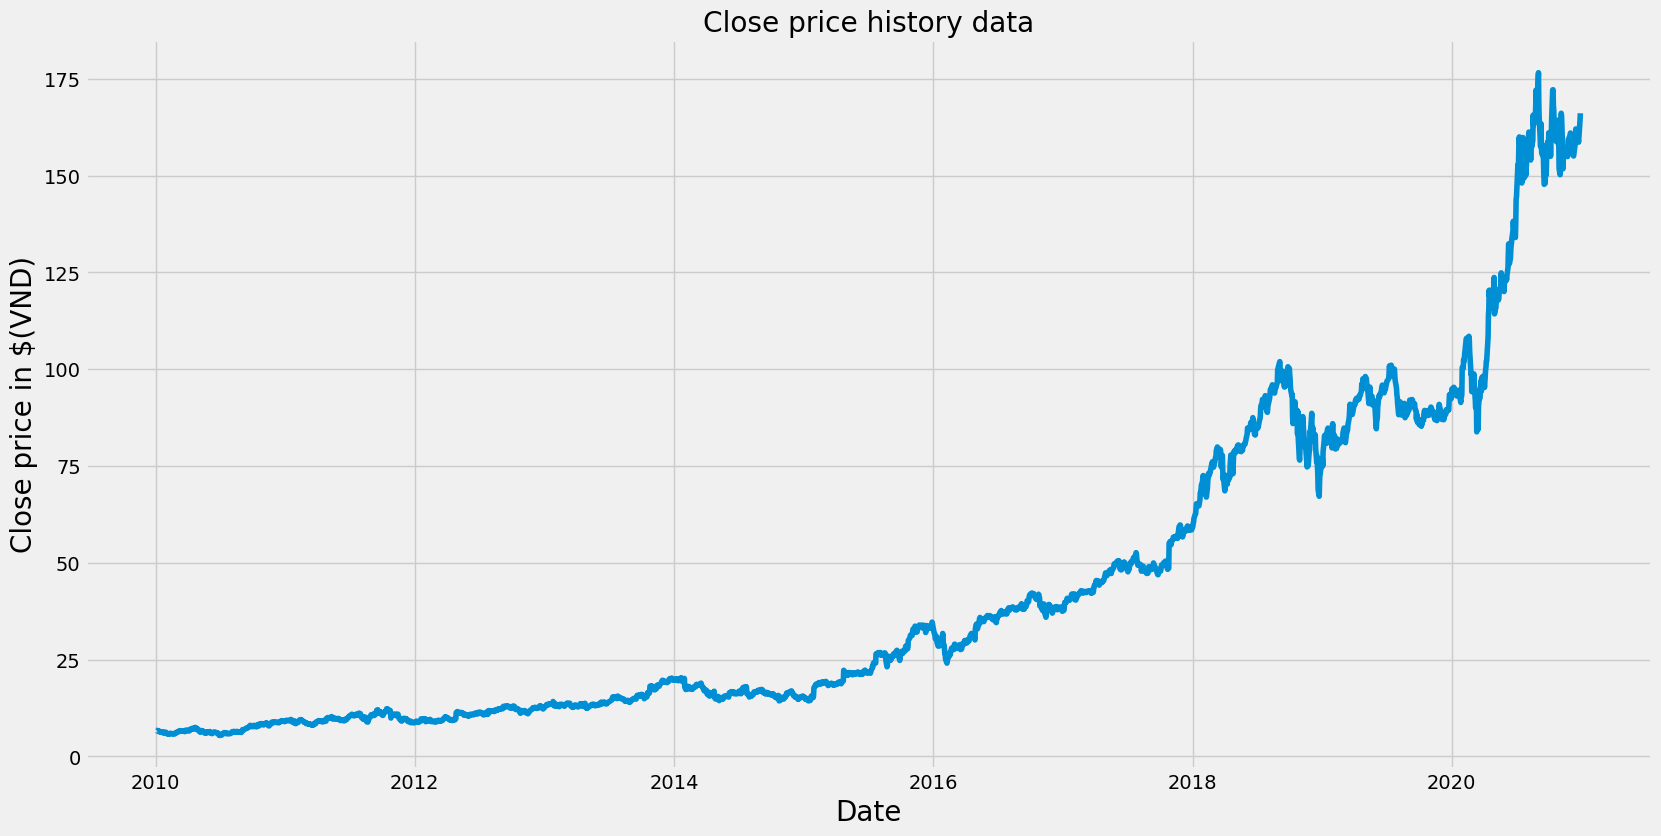

In [28]:
#Đây là biểu đồ giá đóng cửa của data từ khoảng thời gian 1/4/2016 đến 10/1/2022
mtlplt.figure(figsize=(18,9))
mtlplt.title('Close price history data')
mtlplt.plot(df['Close']) 
mtlplt.xlabel('Date', fontsize=20) #trục x biễu diễn cột Date
mtlplt.ylabel('Close price in $(VND)',fontsize=20) #trục y biểu diễn giá đóng trong ngày
mtlplt.show

# Tiền xử lý tập dữ liệu

In [29]:
#Tạo dataframe chỉ có cột giá đóng
stock_close_data = df.filter(['Close'])

#chuyển đổi dataframe đã tạo thành mảng numpy bằng hàm values
stock_close_dataset = stock_close_data.values

#chia dữ liệu thành tập train and test(train chiếm 80% data và test 20% còn lại của data)
trainingDataLength = math.ceil( len(stock_close_dataset) * 0.8 )

#hiển thị độ dài tập trai
trainingDataLength

2214

In [30]:
#Scale dữ liệu về dạng 0,1 giúp model train nhanh hơn. 
#Lstm hoạt động tốt hơn khi các giá trị đầu vào được chia tỷ lệ thành phạm vi tiêu chuẩn
scaler = MinMaxScaler(feature_range=(0,1))

#tiến hành scale dữ liệu bằng fit.trainsform
scaledData = scaler.fit_transform(stock_close_dataset)

#hiển thị giá trị dữ liệu được chia
scaledData.shape

(2767, 1)

In [31]:
#tạo tập dữ liệu mới chứa giá trị giá trị scale có kích thước từ 0 đến kích thươc dữ liệu 80% ở trên
StockTrainData = scaledData[0:trainingDataLength , :]

#tách dữ liệu thành 2 phần Xtrain và Ytrain
Xtrain = []
Ytrain = []
#tiến hành tạo dữ lieu cho xtrain và ytrain bằng vòng lặp trong phạm vi từ 60 đến tổng kích thước dữ liệu huấn luyện
#tạo dữ liệu với timestep=60 ngày, xem xét dữ liệu quá khứ để đoán ra ngày 61 
for i in range(60, len(StockTrainData)):
  Xtrain.append(StockTrainData[i-60:i, 0])
  Ytrain.append(StockTrainData[i, 0])
  if i<= 61:
    print(Xtrain)
    print(Ytrain)
    print()

[array([0.0073886 , 0.0076194 , 0.00690655, 0.0062492 , 0.00727758,
       0.00633977, 0.00547498, 0.00598918, 0.00547498, 0.00541363,
       0.00555095, 0.0050163 , 0.00526171, 0.00374543, 0.00341821,
       0.00317573, 0.00413107, 0.00508934, 0.00490821, 0.00299751,
       0.0027784 , 0.00306471, 0.0021415 , 0.00256512, 0.00240151,
       0.0027521 , 0.00255636, 0.00335394, 0.00322831, 0.00260602,
       0.00224959, 0.00276671, 0.0026031 , 0.00274626, 0.0025213 ,
       0.00324584, 0.00280177, 0.0028602 , 0.00465403, 0.00494326,
       0.00504844, 0.00581973, 0.00593075, 0.00628133, 0.00590445,
       0.00639819, 0.00729511, 0.00678092, 0.00657933, 0.00677215,
       0.00664068, 0.00705554, 0.00635145, 0.00638651, 0.006033  ,
       0.00567657, 0.00763109, 0.0077275 , 0.00774503, 0.00817158])]
[0.00793493032036613]

[array([0.0073886 , 0.0076194 , 0.00690655, 0.0062492 , 0.00727758,
       0.00633977, 0.00547498, 0.00598918, 0.00547498, 0.00541363,
       0.00555095, 0.0050163 , 0.00

In [32]:
#chuyển đổi dữ liệu Xtrain, dữ liệu Ytrain thành mảng numpy 
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [33]:
#định hình lại dữ liệu Xtrain cho phù hợp với dữ liệu đầu vào thành dạng 3D và 1 đối tượng đại diện giá đóng cửa
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain.shape

(2154, 60, 1)

# Tạo model và xây dựng mô hình LSTM

In [34]:
#khởi tạo model
model = Sequential()

neurons = 50

#lớp LSTM đầu
model.add(LSTM(neurons, return_sequences=True, input_shape= (Xtrain.shape[1], 1))) 

#lớp LSTM thứ 2, không còn lớp nào cho lstm nên return_sequences= False
model.add(LSTM(neurons, return_sequences= False)) 

#thêm lớp nơron dày đặc
model.add(Dense(25)) 
model.add(Dense(1))

In [35]:
#biên dịch model
model.compile(optimizer='adam', loss='mse') 

In [ ]:
#đào tạo với tập Xtrain, Ytrain đã cho
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=200, verbose=2) 

Epoch 1/200
44/44 - 5s - loss: 0.0032 - 5s/epoch - 114ms/step
Epoch 2/200
44/44 - 1s - loss: 8.1743e-05 - 1s/epoch - 25ms/step
Epoch 3/200
44/44 - 1s - loss: 6.6439e-05 - 1s/epoch - 25ms/step
Epoch 4/200
44/44 - 1s - loss: 7.3472e-05 - 1s/epoch - 26ms/step
Epoch 5/200
44/44 - 1s - loss: 6.2169e-05 - 1s/epoch - 27ms/step
Epoch 6/200
44/44 - 1s - loss: 6.2428e-05 - 1s/epoch - 25ms/step
Epoch 7/200
44/44 - 1s - loss: 6.0669e-05 - 1s/epoch - 26ms/step
Epoch 8/200
44/44 - 1s - loss: 7.0798e-05 - 1s/epoch - 25ms/step
Epoch 9/200
44/44 - 1s - loss: 6.1347e-05 - 1s/epoch - 25ms/step
Epoch 10/200
44/44 - 1s - loss: 5.9399e-05 - 1s/epoch - 25ms/step
Epoch 11/200
44/44 - 1s - loss: 5.7162e-05 - 1s/epoch - 26ms/step
Epoch 12/200
44/44 - 1s - loss: 1.2660e-04 - 1s/epoch - 25ms/step
Epoch 13/200
44/44 - 1s - loss: 6.1718e-05 - 1s/epoch - 25ms/step
Epoch 14/200
44/44 - 1s - loss: 5.9215e-05 - 1s/epoch - 25ms/step
Epoch 15/200
44/44 - 1s - loss: 5.2263e-05 - 1s/epoch - 25ms/step
Epoch 16/200
44/44 - 1

Epoch 125/200
44/44 - 1s - loss: 2.0456e-05 - 1s/epoch - 24ms/step
Epoch 126/200
44/44 - 1s - loss: 1.7828e-05 - 1s/epoch - 24ms/step
Epoch 127/200
44/44 - 1s - loss: 2.6254e-05 - 1s/epoch - 25ms/step
Epoch 128/200
44/44 - 1s - loss: 1.7087e-05 - 1s/epoch - 27ms/step
Epoch 129/200
44/44 - 1s - loss: 1.7525e-05 - 1s/epoch - 26ms/step
Epoch 130/200
44/44 - 1s - loss: 1.6782e-05 - 1s/epoch - 26ms/step
Epoch 131/200
44/44 - 1s - loss: 2.4634e-05 - 1s/epoch - 25ms/step
Epoch 132/200
44/44 - 1s - loss: 1.6794e-05 - 1s/epoch - 25ms/step
Epoch 133/200
44/44 - 1s - loss: 2.2206e-05 - 1s/epoch - 25ms/step
Epoch 134/200
44/44 - 1s - loss: 1.7560e-05 - 1s/epoch - 24ms/step
Epoch 135/200
44/44 - 1s - loss: 1.5069e-05 - 1s/epoch - 24ms/step
Epoch 136/200
44/44 - 1s - loss: 2.4506e-05 - 1s/epoch - 24ms/step
Epoch 137/200
44/44 - 1s - loss: 1.6077e-05 - 1s/epoch - 24ms/step
Epoch 138/200
44/44 - 1s - loss: 1.8237e-05 - 1s/epoch - 24ms/step
Epoch 139/200
44/44 - 1s - loss: 2.2336e-05 - 1s/epoch - 24ms/

# Xây dựng tập thử nghiệm test

In [ ]:
#tạo tập dữ liệu test với timestep=60 ngày tương tự như tập train
testingData = scaledData[trainingDataLength - 60: , :]

#tạo tập Xtest và Ytest
Xtest = []
Ytest = stock_close_dataset[trainingDataLength:, :]
for i in range(60, len(testingData)):
  Xtest.append(testingData[i-60:i, 0])

In [15]:
#chuyển dữ liệu Xtest thành mảng numpy
Xtest = np.array(Xtest)
Xtest

array([[0.47342888, 0.47976576, 0.47846818, ..., 0.46067191, 0.4570843 ,
        0.45422715],
       [0.47976576, 0.47846818, 0.46875944, ..., 0.4570843 , 0.45422715,
        0.44799815],
       [0.47846818, 0.46875944, 0.47329327, ..., 0.45422715, 0.44799815,
        0.45142549],
       ...,
       [0.89324087, 0.89640623, 0.88799199, ..., 0.91322238, 0.8919063 ,
        0.89614733],
       [0.89640623, 0.88799199, 0.90403144, ..., 0.8919063 , 0.89614733,
        0.88536909],
       [0.88799199, 0.90403144, 0.8989305 , ..., 0.89614733, 0.88536909,
        0.85381723]])

In [16]:
#Reshape dữ liệu 
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1 ))

In [17]:
#Chuyển đổi về dạng giá thông thường mà ta đọc được 
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)
predictions

10/10 [==============================] - 1s 12ms/step


array([[1708.8907],
       [1691.7102],
       [1699.6345],
       [1701.6305],
       [1694.1709],
       [1701.0509],
       [1712.6862],
       [1715.1836],
       [1721.6586],
       [1740.2489],
       [1737.1691],
       [1741.8842],
       [1737.0507],
       [1741.0085],
       [1738.5554],
       [1806.3254],
       [1819.9935],
       [1798.6912],
       [1793.0494],
       [1835.4508],
       [1822.9591],
       [1843.622 ],
       [1850.4591],
       [1837.5048],
       [1842.8557],
       [1828.5687],
       [1833.8977],
       [1816.8013],
       [1808.2743],
       [1822.3156],
       [1814.371 ],
       [1837.0526],
       [1837.0067],
       [1833.1953],
       [1811.5126],
       [1778.521 ],
       [1795.7845],
       [1805.2131],
       [1818.3514],
       [1942.1168],
       [1956.4868],
       [1991.3263],
       [1980.8832],
       [1983.3655],
       [2007.9429],
       [2060.6335],
       [2081.3223],
       [2089.2466],
       [2078.0398],
       [2061.5996],


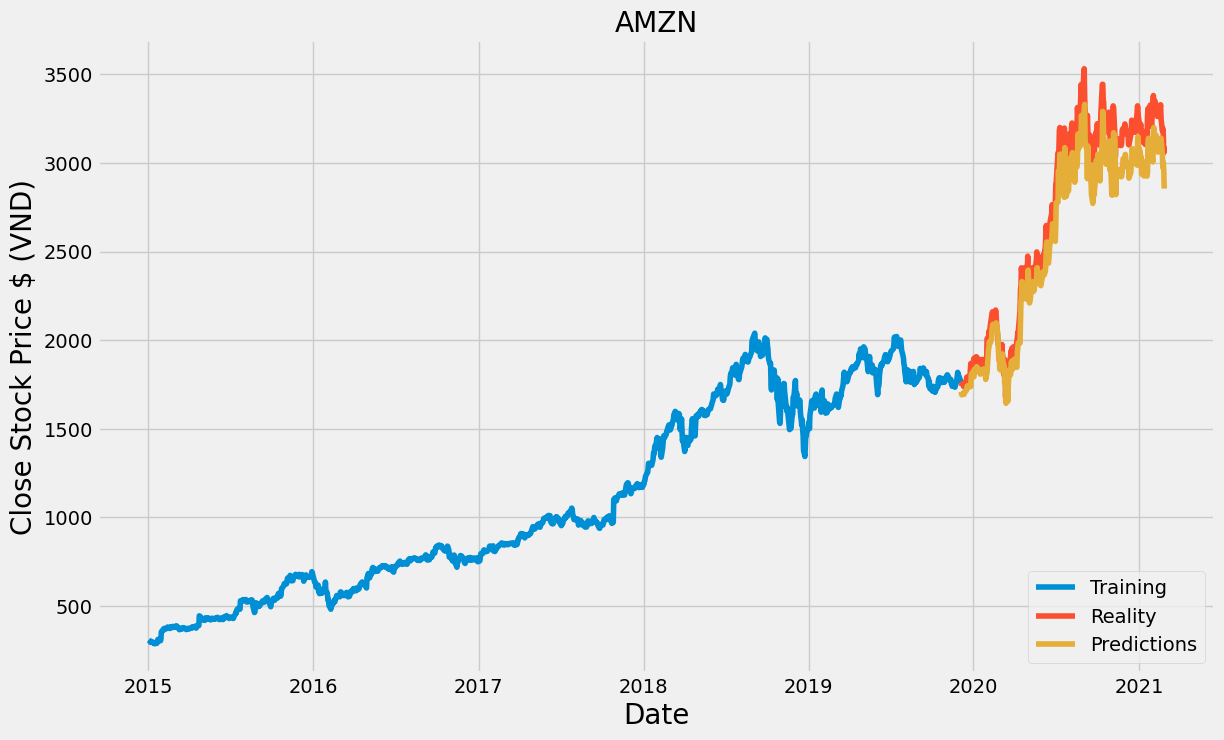

In [19]:
#vẽ biểu đồ để biễu diễn dự đoán 
#chia tệp data thành tập train và reality sau đó xây dựng tệp predictions để so sánh 
training = stock_close_data[:trainingDataLength]
reality= stock_close_data[trainingDataLength:]
reality['Predictions'] = predictions

root = tkinter.Tk()
fig = mtlplt.figure(figsize=(20,10))
mtlplt.title('AMZN')
mtlplt.xlabel('Date', fontsize=20)
mtlplt.ylabel('Close Stock Price $ (VND)', fontsize=20)
mtlplt.plot(training['Close'])
mtlplt.plot(reality[['Close', 'Predictions']])
mtlplt.legend(['Training', 'Reality', 'Predictions'], loc='lower right')
canvas = FigureCanvasTkAgg(fig, master=root) 
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

root.geometry('1400x900')
root.mainloop()

In [20]:
#Show dữ liệu Close và Predictions
reality

,Close,Predictions
Date,,
2019-12-05,1740.48,1708.890747
2019-12-06,1751.60,1691.710205
2019-12-09,1749.51,1699.634521
2019-12-10,1739.21,1701.630493
2019-12-11,1748.72,1694.170898
...,...,...
2021-02-22,3180.74,3041.148438
2021-02-23,3194.50,2972.492432
2021-02-24,3159.53,3002.532959


In [22]:
#In kết quả của giá đóng và giá dự đoán ra file csv
reality.to_csv('AMZN_Ketquadubao.csv')

In [23]:
mae = np.mean(np.abs(Ytest - predictions ))
print(mae)
rmse = np.sqrt(np.mean((Ytest - predictions) ** 2))
print(rmse)
#tính độ chính xác của dự báo
mape = np.mean(np.abs((Ytest - predictions )/ Ytest)) *100
print(mape)

134.37796833914845
154.8476913605858
4.761501634671841
